# 0-1ナップザック問題　GA

In [297]:
import random
import copy
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pprint

## 個体(エージェント) クラスの定義

In [298]:
class Agent:
    #初期化
    def __init__(self, M):
        #遺伝子の初期化
        self.gene = [random.randint(0,1) for i in range(M)]
        self.weight = 0 #重さ
        self.fitness = 0 #適応度（価値の合計）
        
    #適応度計算
    def calc_fitness(self, items, MAX_WEIGHT):
        self.weight = sum([n* item[0] for n, item in zip(self.gene, items)])
        self.fitness = sum([n* item[1] for n, item in zip(self.gene, items)])
        if self.weight > MAX_WEIGHT:#制限重量を超えてたら適応度を0にする
            self.fitness = 0
    

## シミュレーションクラスの定義

In [299]:
class Simulation:
    #初期化
    def __init__(self, items, max_weight, N):
        self.items = items        # アイテムをタプルのリストとして受け取る
        self.max_weight = max_weight     # 制限重量
        self.N = N                       # 個体数
        self.mutation_rate = 0.1         # 突然変異が起こる確率
        
        
        self.max_score = -1
        # 個体群の生成 
        self.population = [Agent(len(self.items)) for i in range(self.N)]
        # 次世代の個体群
        self.offspring = []
        
    # ルーレット選択
    def roulette_selection(self):
        roulette = [] 
        for i in self.population:
            roulette.append(i.fitness)

        probs = np.array(roulette)/sum(roulette)
        
        parent = []
        for i in range(2):
            selected = np.random.choice(self.population, p = probs)
            parent.append(copy.deepcopy(selected))
        
        return parent
    # 一点交叉
    def crossover(self, parent1, parent2):
        r = random.randint(0, len(parent1.gene) - 1)
        offsprintg1 = copy.deepcopy(parent1)
        offsprintg2 = copy.deepcopy(parent2)
        offsprintg1.gene[r:] = parent2.gene[r:]
        offsprintg2.gene[r:] = parent1.gene[r:]
        
        # 次世代プールに追加
        self.offspring.append(offsprintg1)
        self.offspring.append(offsprintg2)
    
    # 突然変異
    def mutate(self, agent):
        r = random.choice(range(len(agent.gene)))
        agent.gene[r] = 1 if agent.gene[r] == 0 else 0
        
    # 世代交代
    def generation_change(self):
        self.population.clear()
        self.population = copy.deepcopy(self.offspring)
        self.offspring.clear()
    
    # ナップザック問題を解く　=　GAで個体群を進化させていく
    def solve(self):
        # 平均適応度，最大適応度をリストに追加
        mean_list.append(self.mean_fitness())
        max_list.append(self.max_fitness())
        
        # 適応度計算
        for agent in self.population:
            agent.calc_fitness(self.items, self.max_weight)
        
        # 個体群の情報出力
        self.print_population()
        
        # 選択，交叉
        while len(self.offspring) < len(self.population):
            parent = self.roulette_selection()
            self.crossover(parent[0], parent[1])
        
        # 突然変異
        for agent in self.population:
            if random.random() < self.mutation_rate:
                self.mutate(agent)
        
        #世代交代
        self.generation_change()
        
        # 最大値，その時の遺伝子を保持
        self.max_combination()
        
    # 個体群の情報出力
    def print_population(self):
        for i in self.population:
            print(i.gene, i.fitness)
    
    #集団の平均適応度
    def mean_fitness(self):
        fitness = []
        for i in self.population:
            fitness.append(i.fitness)
        
        return mean(fitness)
    
    # 集団の最大適応度
    def max_fitness(self):
        fitness = []
        for i in self.population:
            fitness.append(i.fitness)
            
        return max(fitness)
    
    def max_combination(self):
        for i in range(self.N):
            if self.max_score < self.population[i].fitness:
                self.max_score = self.population[i].fitness
                max_gene.clear()
                max_gene.append(self.population[i].gene)



In [300]:
#アイテムをランダムに生成
#num_item = int(input("アイテムの数:"))
num_item = 5
print("入れるものの候補 :（重量，価値）")
ITEMS = [(random.randint(0,15), random.randint(0, 100)) for i in range(num_item)]
sum_weight = 0
for weight, value in ITEMS:
    sum_weight += weight
print("ITEMS:", ITEMS)
print("合計重量:",sum_weight)

入れるものの候補 :（重量，価値）
ITEMS: [(12, 11), (4, 100), (3, 84), (4, 64), (15, 89)]
合計重量: 38


アイテム一覧:  重量, 価値
 1: 12, 11   2:  4,100   3:  3, 84   4:  4, 64   5: 15, 89  
合計重量: 38
制限重量 = 25, 個体数 = 10, 世代数= 30

genetarion: 1
[0, 0, 1, 1, 0] 148
[1, 0, 1, 0, 0] 95
[1, 0, 0, 0, 1] 0
[1, 1, 1, 0, 1] 0
[0, 1, 1, 1, 0] 248
[0, 0, 0, 1, 1] 153
[1, 0, 1, 0, 1] 0
[1, 1, 0, 1, 1] 0
[1, 1, 1, 1, 0] 259
[1, 1, 0, 0, 0] 111

genetarion: 2
[1, 1, 0, 1, 0] 175
[1, 1, 1, 0, 0] 195
[1, 1, 1, 1, 0] 259
[0, 1, 0, 0, 0] 100
[0, 1, 1, 1, 1] 0
[0, 0, 0, 1, 0] 64
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[0, 1, 1, 1, 0] 248
[1, 1, 1, 1, 0] 259

genetarion: 3
[1, 1, 1, 0, 0] 195
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 0, 1, 0] 175
[1, 1, 1, 1, 0] 259
[1, 1, 1, 0, 0] 195
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259

genetarion: 4
[1, 1, 1, 0, 0] 195
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 1, 0] 259
[1, 1, 1, 0, 0] 195
[1, 1, 1, 1, 0] 259

genetarion: 5
[1, 1, 1, 1, 0] 259
[1

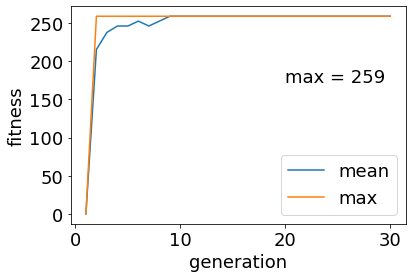

In [301]:

MAX_WEIGHT = int(input("weight:")) # 制限重量
# N = int(input("N:")) # 個体数 
# GENERATION = int(input("generation:")) # 世代数
N = 10
GENERATION = 30
print("アイテム一覧:  重量, 価値")

#pprint.pprint(ITEMS, width=40, compact= True)
for i,item in enumerate(ITEMS):
    print(f"{i+1:2d}: {item[0]:>2d},{item[1]:>3d}  ", end='')
    if (i+1) % 5 == 0:
        print("")
print("合計重量:",sum_weight)
print(f"制限重量 = {MAX_WEIGHT}, 個体数 = {N}, 世代数= {GENERATION}")
# グラフ用リスト
g_list = []
mean_list = []
max_list = []
max_gene = []

sim = Simulation(ITEMS, MAX_WEIGHT, N)
for i in range (GENERATION):
    
    print("\ngenetarion:", i+1)
    g_list.append(i+1)
    sim.solve()
print("\n[シミュレーション結果]")
print("max_score: {}".format(max(max_list)))
print("maxとなる遺伝子: ",*max_gene[0])

# グラフ生成
plt.rcParams["font.size"] = 18
plt.plot(g_list, mean_list, label = "mean")
plt.plot(g_list, max_list, label = "max")
plt.text(GENERATION*2/3, max(max_list)*2/3,"max = {}".format(max(max_list)))
plt.xlabel("generation")
plt.ylabel("fitness")
plt.legend()